In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')


In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# data cleaning 
# 2 - EDA 
# 3 - Text Preprocessing 
# 4 - Model Building 
# 5 -Evaluation 
# 6 - Improvement 
# 7 - website 
# 8 - deploy

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 columns 
df.drop(columns = ['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'] , inplace = True)

In [8]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# renaming columns 
df = df.rename(columns = {'v1':'target' , 'v2':'text'})

In [10]:
df.sample(5)

,target,text
2107,ham,Hmmm ... And imagine after you've come home fr...
4444,ham,"2 celebrate my båÕday, y else?"
3604,ham,Jordan got voted out last nite!
106,ham,"Aight, I'll hit you up when I get some cash"
1744,spam,Someone has conacted our dating service and en...


In [11]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
encoder = LabelEncoder()


In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# missing value 
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# check for the duplicated value 
df.duplicated().sum()

403

In [16]:
# remove duplicate values 
df = df.drop_duplicates(keep = 'first')

In [17]:
 df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

In [19]:
# EDA 

In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

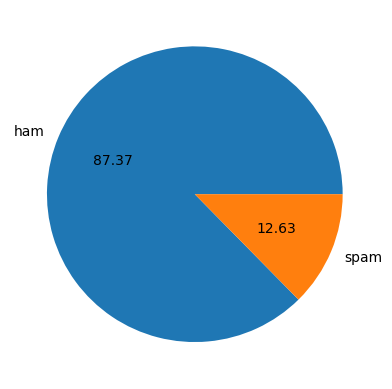

In [21]:
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")
plt.show()

In [22]:
pip install nltk


Note: you may need to restart the kernel to use updated packages.


In [23]:
# data is imbalanced 

import nltk


In [24]:
df['num_characters'] = df['text'].apply(len)

In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
# num of words 
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
# num of sentences  
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df[['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [31]:
df[df['target']==0][['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
df[df['target']==1][['num_characters' , 'num_words' , 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [33]:
import seaborn as sns 

<Axes: xlabel='num_characters', ylabel='Count'>

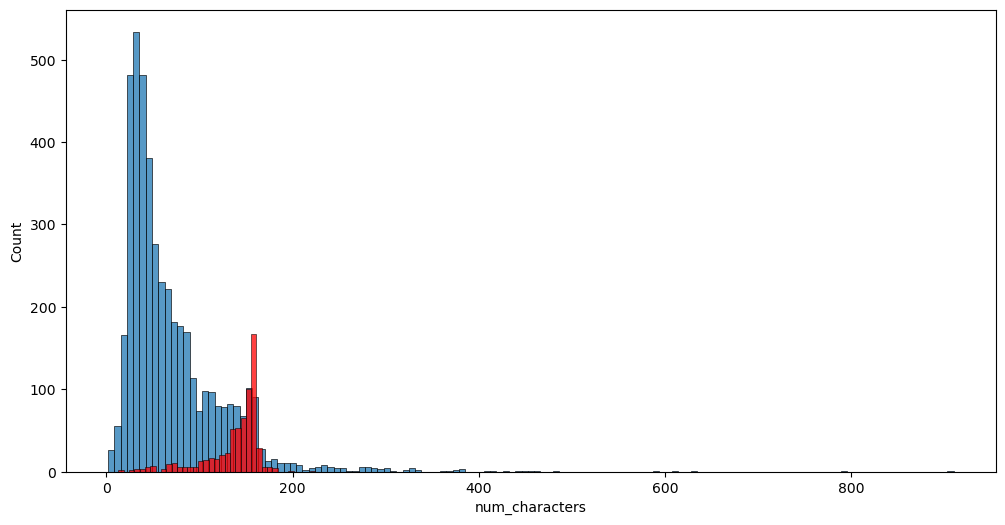

In [34]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target']==0]['num_characters']) 
sns.histplot(df[df['target']==1]['num_characters'] , color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

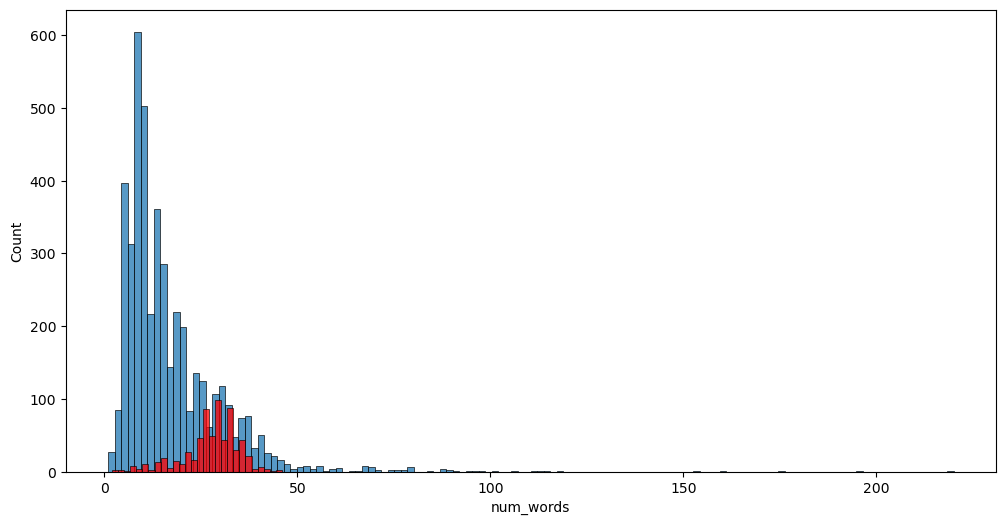

In [35]:
plt.figure(figsize = (12,6))
sns.histplot(df[df['target']==0]['num_words']) 
sns.histplot(df[df['target']==1]['num_words'] , color = 'red')

C:\Users\sonal\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


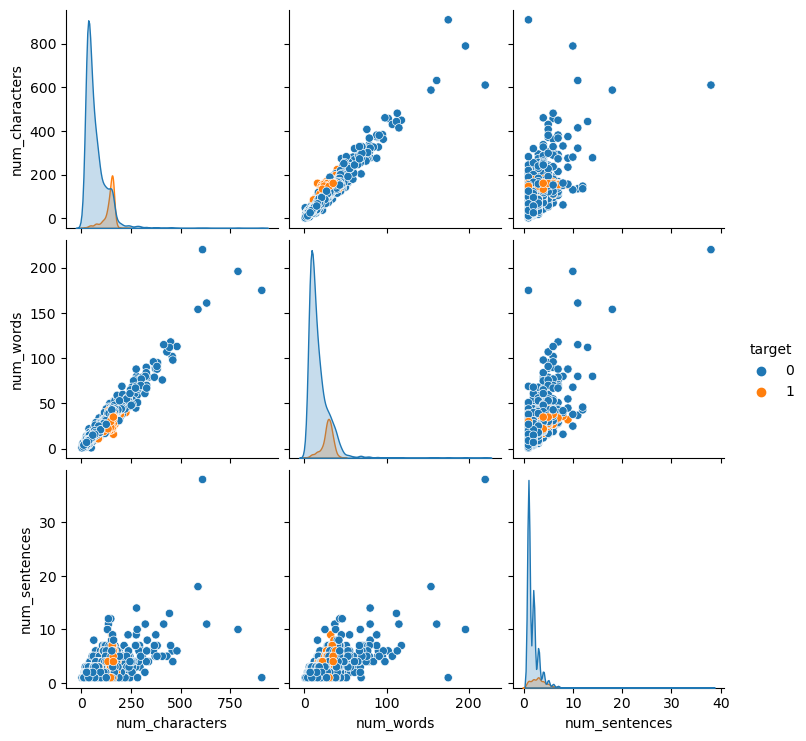

In [36]:
sns.pairplot(df , hue ='target' )

In [37]:
# text preprocessing 
# 1 - lowe case 
# 2 - tokenization 
# 3 - removing special characters 
# 4 - removing stop words and punctuation 
# 5 - stemming 

In [38]:
# stemming 
from nltk.stem.porter import PorterStemmer 
ps = PorterStemmer() 
ps.stem('loving')

'love'

In [39]:
import nltk
from nltk.corpus import stopwords
import string

nltk.download('punkt')
nltk.download('stopwords')

def transform_text(text):
    text = text.lower()  
    text = nltk.word_tokenize(text)  
    y = []
    for i in text: 
        if i.isalnum(): 
            y.append(i) 
    
    text = y[:] 
    y.clear() 
    
    for i in text: 
        if i not in stopwords.words('english') and i not in string.punctuation: 
            y.append(i) 
     
    text = y[:] 
    y.clear() 
    
    for i in text: 
        y.append(ps.stem(i))
    return " ".join(y)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sonal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sonal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
transform_text('hi how are $ you krishan')

'hi krishan'

In [41]:
transform_text('Did you like my presentation on ML?')

'like present ml'

In [42]:
transform_text('I loved the YT lectures on Machine Learning')

'love yt lectur machin learn'

In [43]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [44]:
df['transformed_text'] = df['text'].apply(transform_text)

In [45]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
from wordcloud import WordCloud 
wc = WordCloud(width = 400 , height = 400 , min_font_size = 10 , background_color = 'white')

In [47]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep = " "))

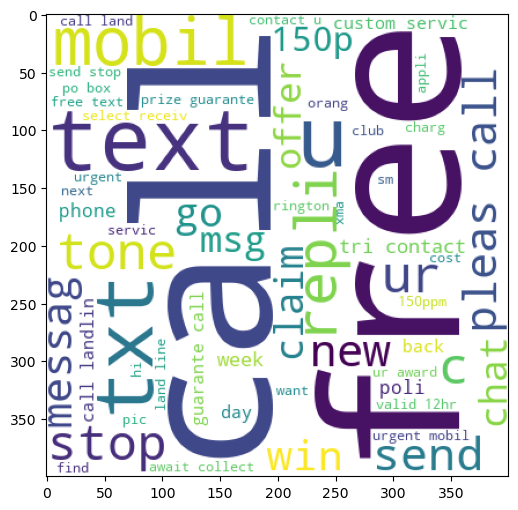

In [48]:
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

In [49]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep = " "))

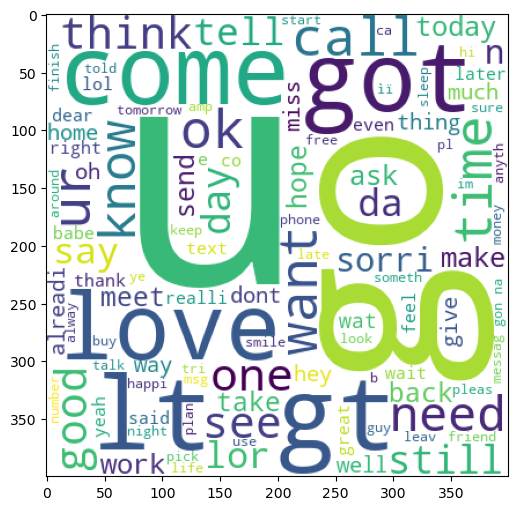

In [50]:
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)

In [51]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [52]:
len(spam_corpus)

9939

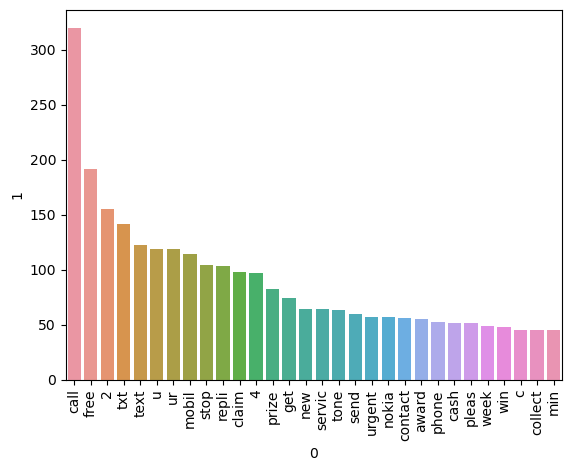

In [53]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [54]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [55]:
len(ham_corpus)

35404

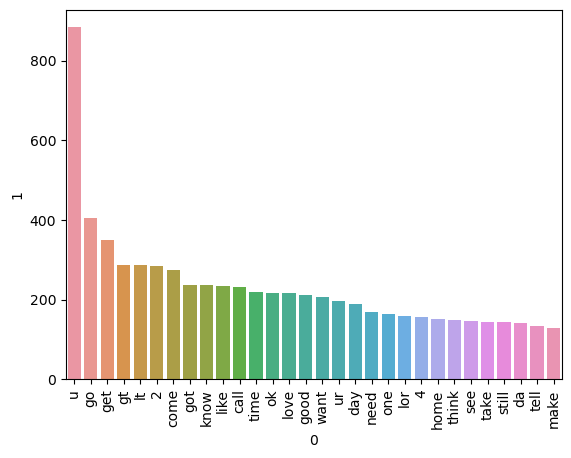

In [56]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

MODEL BUILDING

In [57]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [58]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer() 
tfidf = TfidfVectorizer(max_features = 3000)

In [59]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [60]:
x.shape

(5169, 3000)

In [61]:
y = df['target'].values

In [62]:
from sklearn.model_selection import train_test_split 

In [63]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 2)

In [64]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB  
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score

In [65]:
gnb = GaussianNB() 
mnb = MultinomialNB() 
bnb = BernoulliNB()

In [66]:
gnb.fit(x_train , y_train) 
y_pred1 = gnb.predict(x_test) 
print(accuracy_score(y_test , y_pred1)) 
print(confusion_matrix(y_test , y_pred1)) 
print(precision_score(y_test , y_pred1)) 


0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [67]:
mnb.fit(x_train , y_train) 
y_pred2 = mnb.predict(x_test) 
print(accuracy_score(y_test , y_pred2)) 
print(confusion_matrix(y_test , y_pred2)) 
print(precision_score(y_test , y_pred2)) 


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [68]:
bnb.fit(x_train , y_train) 
y_pred3 = bnb.predict(x_test) 
print(accuracy_score(y_test , y_pred3)) 
print(confusion_matrix(y_test , y_pred3)) 
print(precision_score(y_test , y_pred3)) 


0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [69]:
# tfidf->mnb

In [70]:
# model improvement  
# 1. change the max_features parameter of tfidf  
# multinomial naive bayes is performing well out of three variations 

In [71]:
import pickle

# Save tfidf object
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

# Save mnb object
with open('model.pkl', 'wb') as f:
    pickle.dump(mnb, f)
